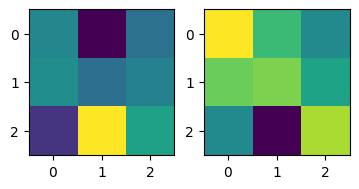

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
 
#uncomment this if you're using jupyter notebook
%matplotlib inline
 
#generate known U and V matrices
m = 10
U = tf.random.normal((3,3), dtype = 'float32')
V = tf.random.normal((3,3), dtype = 'float32')
 
# Our (3,3) "ranking" matrix.
M = U @ V

#we can visualize what our matrices look like
plt.subplot(131)
plt.imshow(U)
plt.subplot(132)
plt.imshow(V)
plt.show()

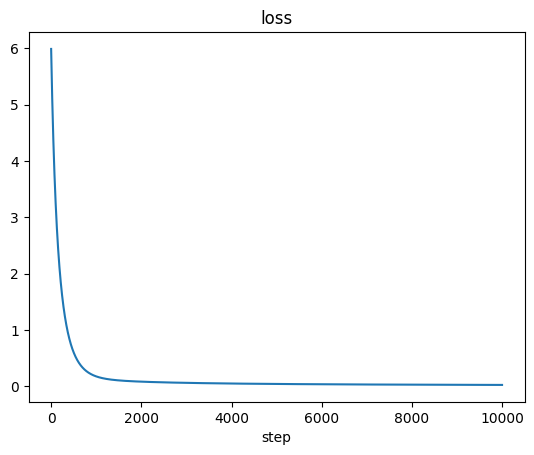

In [6]:
U_d = tf.Variable(tf.random.normal((3,3), dtype = 'float32'))
V_d = tf.Variable(tf.random.normal((3,3), dtype = 'float32'))
epochs = 10000
lr = 0.001
losses = []
 
for ep in range(epochs):
 
    with tf.GradientTape() as tape:
        M_app = U_d @ V_d
        loss = tf.reduce_mean(tf.square(M - M_app))
 
    losses.append(loss.numpy())
    grads = tape.gradient(loss, [U_d, V_d])
     
    U_d.assign_sub(lr * grads[0])
    V_d.assign_sub(lr * grads[1])
 
losses = np.array(losses)
plt.plot(losses)
plt.title('loss')
plt.xlabel('step')
plt.show()